# **Parte 2 - Datos Aleatorios**

Para comenzar, en este proyecto, procedemos a importar las bibliotecas esenciales que serán fundamentales en el desarrollo de nuestro modelo de regresión polinomial.

In [29]:
import numpy as np
import matplotlib.pyplot as plt


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import widgets

from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.utils import resample
from sklearn.metrics import mean_squared_error, mean_absolute_error

import pickle

Continuamos el proceso cargando los conjuntos de datos descargados del Moodle, los cuales están distribuidos en cuatro categorías esenciales: el conjunto de entrenamiento de características (x_train) con 12 observaciones, el conjunto de validación de características (x_val) con 10 observaciones, el conjunto de entrenamiento de etiquetas (y_train) con 12 observaciones y el conjunto de validación de etiquetas (y_val) con 10 observaciones.

In [30]:
X_train = np.load("/content/drive/MyDrive/Universidad/AAD/Parcial1/part2xTrain.npy")
X_test = np.load("/content/drive/MyDrive/Universidad/AAD/Parcial1/part2xVal.npy")

y_train = np.load("/content/drive/MyDrive/Universidad/AAD/Parcial1/part2yTrain.npy")
y_test = np.load("/content/drive/MyDrive/Universidad/AAD/Parcial1/part24yVal.npy")

A continuación, procedimos a generar un Gráfico de Dispersión para visualizar la relación entre el conjunto de etiquetas de entrenamiento (y_train) y el conjunto de etiquetas de validación (y_val). Este gráfico nos proporciona una primera impresión de cómo se distribuyen nuestros datos objetivo en ambos conjuntos.

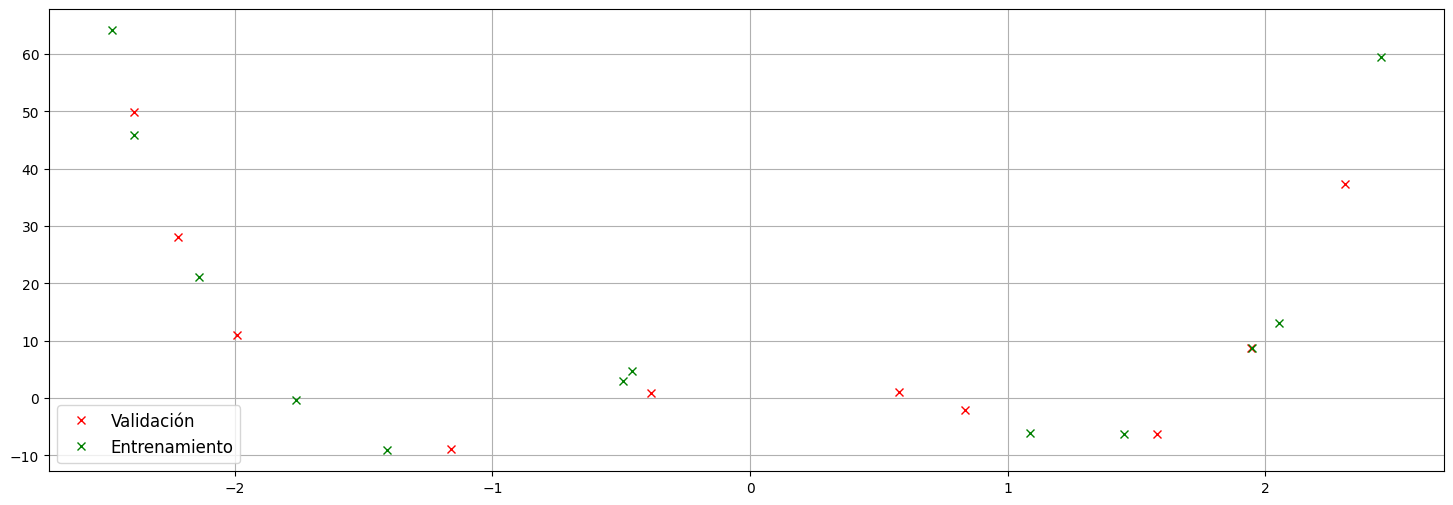

In [31]:
fig, axe = plt.subplots(figsize=(18, 6))
axe.plot(X_test, y_test, "rx", label = "Validación")
axe.plot(X_train, y_train, "gx", label = "Entrenamiento")
axe.grid()
axe.legend(fontsize=12)

### **1. Regresión Polinomial y Validación Cruzada**

En la fase siguiente de nuestra actividad, procedimos a implementar modelos de regresión polinomial de varios grados con el fin de analizar la complejidad del modelo y su capacidad para adaptarse a los datos. Para evaluar objetivamente el rendimiento de estos modelos, empleamos una técnica crucial de validación cruzada en el conjunto de entrenamiento. Este proceso nos permitió obtener una visión más profunda de cómo nuestros modelos se desempeñan en diferentes configuraciones de grado polinomial. Luego, para cuantificar la precisión de nuestras predicciones, calculamos dos métricas fundamentales: el Error Cuadrático Medio (MSE) y el Error Absoluto Medio (MAE). Estas métricas nos proporcionan una medida cuantitativa de la calidad de nuestras predicciones y nos ayudan a comparar y seleccionar el modelo más adecuado para nuestro problema de regresión.

In [35]:
X = np.concatenate([X_train, X_test])
y = np.concatenate([y_train, y_test])

In [36]:
orders = range(1, 10)
k=7

MSE_Train = dict.fromkeys(orders)
MSE_Test = dict.fromkeys(orders)
MAE_Train = dict.fromkeys(orders)
MAE_Test = dict.fromkeys(orders)


tb = widgets.TabBar([str(order) for order in orders])

for order in orders:
    with tb.output_to(str(order), select=(order < 2)):

        print("\n --------------------- \n\n\tPolinomio de orden", order)

        mse_train_sum = 0
        mae_train_sum = 0
        mse_test_sum = 0
        mae_test_sum = 0

        kf = KFold(n_splits=k,shuffle=True, random_state=0)

        for train_idx, test_idx in kf.split(X):

          X_train_ind = X[train_idx]
          y_train_ind = y[train_idx]
          X_test_ind = X[test_idx]
          y_test_ind = y[test_idx]

          X_train_ind = X_train_ind.reshape(-1, 1)
          y_train_ind = y_train_ind.reshape(-1, 1)
          X_test_ind = X_test_ind.reshape(-1, 1)
          y_test_ind = y_test_ind.reshape(-1, 1)

          poly = PolynomialFeatures(degree=order)
          X_train_poly = poly.fit_transform(X_train_ind)
          X_test_poly = poly.fit_transform(X_test_ind)

          model = LinearRegression()
          model.fit(X_train_poly, y_train_ind)
          y_train_pred = model.predict(X_train_poly)
          y_test_pred = model.predict(X_test_poly)

          mse_train_sum += mean_squared_error(y_train_ind, y_train_pred)
          mae_train_sum += mean_absolute_error(y_train_ind, y_train_pred)
          mse_test_sum += mean_squared_error(y_test_ind, y_test_pred)
          mae_test_sum += mean_absolute_error(y_test_ind, y_test_pred)

        print("MSE_Train_AVG =", mse_train_sum / kf.n_splits)
        print("MSE_Test_AVG =", mse_test_sum / kf.n_splits, "\n")
        print("MAE_Train_AVG =", mae_train_sum / kf.n_splits)
        print("MAE_Test_AVG =", mae_test_sum / kf.n_splits)

        MSE_Train[order] = mse_train_sum / kf.n_splits
        MSE_Test[order] = mse_test_sum / kf.n_splits
        MAE_Train[order] = mae_train_sum / kf.n_splits
        MAE_Test[order] = mae_test_sum / kf.n_splits

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


 --------------------- 

	Polinomio de orden 1
MSE_Train_AVG = 469.97263354433437
MSE_Test_AVG = 602.5914692801135 

MAE_Train_AVG = 17.601192765388426
MAE_Test_AVG = 19.458372578203864


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


 --------------------- 

	Polinomio de orden 2
MSE_Train_AVG = 144.11988881921246
MSE_Test_AVG = 184.20850761386689 

MAE_Train_AVG = 10.908193736392958
MAE_Test_AVG = 12.335684127785353


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


 --------------------- 

	Polinomio de orden 3
MSE_Train_AVG = 140.806402915994
MSE_Test_AVG = 236.90956181070922 

MAE_Train_AVG = 10.74677075718672
MAE_Test_AVG = 13.349460817782951


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


 --------------------- 

	Polinomio de orden 4
MSE_Train_AVG = 2.3434663376832936
MSE_Test_AVG = 4.866967864646127 

MAE_Train_AVG = 1.2844415058109135
MAE_Test_AVG = 1.8119263381807365


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


 --------------------- 

	Polinomio de orden 5
MSE_Train_AVG = 2.3158478929232875
MSE_Test_AVG = 5.344004722416265 

MAE_Train_AVG = 1.2686547181074093
MAE_Test_AVG = 1.8794604736005063


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


 --------------------- 

	Polinomio de orden 6
MSE_Train_AVG = 2.26651853711985
MSE_Test_AVG = 6.60387596130211 

MAE_Train_AVG = 1.2484179434873586
MAE_Test_AVG = 2.013649775120346


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


 --------------------- 

	Polinomio de orden 7
MSE_Train_AVG = 2.2024751281494805
MSE_Test_AVG = 8.260989339554586 

MAE_Train_AVG = 1.2188945412653076
MAE_Test_AVG = 2.2068744011972474


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


 --------------------- 

	Polinomio de orden 8
MSE_Train_AVG = 1.515888390683753
MSE_Test_AVG = 4.736972741602115 

MAE_Train_AVG = 0.9306367462460797
MAE_Test_AVG = 1.7236014416995515


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


 --------------------- 

	Polinomio de orden 9
MSE_Train_AVG = 1.465468200230667
MSE_Test_AVG = 8.097601270339112 

MAE_Train_AVG = 0.9219966696613919
MAE_Test_AVG = 2.2054251863760963


<IPython.core.display.Javascript object>

Graficamos las curvas de Error Cuadrático Medio (MSE) y Error Absoluto Medio (MAE) en función de diferentes órdenes de modelos polinomiales para comparar el rendimiento de nuestros modelos. En el primer subgráfico, representamos las curvas de MSE tanto para el conjunto de entrenamiento como para el conjunto de validación. Esto nos permite observar cómo varía la calidad de ajuste del modelo a medida que aumenta el grado polinomial y evaluar si estamos enfrentando problemas de sobreajuste o subajuste. De manera análoga, en el segundo subgráfico, mostramos las curvas de MAE para ambas particiones de datos. Estas visualizaciones nos ayudan a tomar decisiones informadas sobre la elección del grado polinomial óptimo para nuestro modelo de regresión.

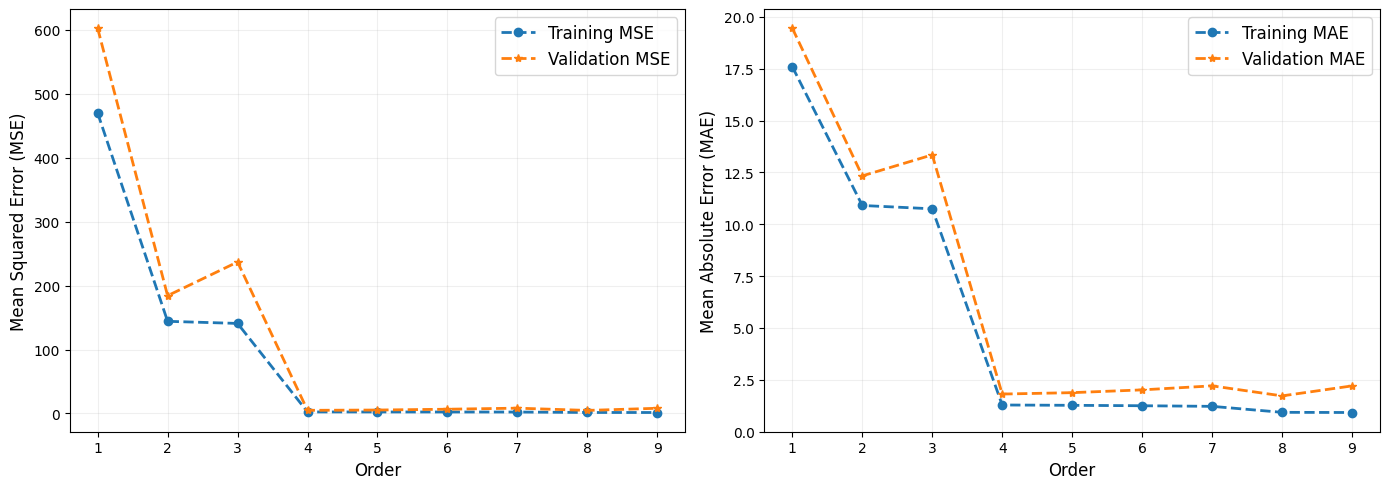

In [37]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plotting MSE
axes[0].plot(orders, list(MSE_Train.values()), '--o', label='Training MSE', linewidth=2)
axes[0].plot(orders, list(MSE_Test.values()), '--*', label='Validation MSE', linewidth=2)
axes[0].set_xlabel("Order", fontsize=12)
axes[0].set_ylabel("Mean Squared Error (MSE)", fontsize=12)
axes[0].grid(alpha=0.2)
axes[0].legend(fontsize=12)

# Plotting MAE
axes[1].plot(orders, list(MAE_Train.values()), '--o', label='Training MAE', linewidth=2)
axes[1].plot(orders, list(MAE_Test.values()), '--*', label='Validation MAE', linewidth=2)
axes[1].set_xlabel("Order", fontsize=12)
axes[1].set_ylabel("Mean Absolute Error (MAE)", fontsize=12)
axes[1].grid(alpha=0.2)
axes[1].legend(fontsize=12)

plt.tight_layout()
plt.show()

Observando las gráficas, podemos concluir que el modelo de grado 4 presenta el mejor rendimiento en términos de MSE y MAE para la validación. En ambos casos, el grado 1 muestra el peor desempeño, ya que exhibe los valores más altos de estas métricas.

### **2. Mejora del Modelo con Regularización**

Para mejorar aún más el rendimiento del modelo, aplicamos técnicas de regularización sin ajustar previamente los hiperparámetros:

In [ ]:
order = 4

print("\n Polinomio de orden", order)

poly = PolynomialFeatures(degree=int(order))
X_train_poly = poly.fit_transform(X.reshape(-1, 1))
X_test_poly = poly.fit_transform(X_test.reshape(-1, 1))

print('Utilizando Ridge')

ridge = Ridge()
ridge.fit(X_train_poly, y_train)
pred_train = ridge.predict(X_train_poly)
pred_test = ridge.predict(X_test_poly)
print("MSE_train = ", mean_squared_error(y_train, pred_train))
print("MSE_test = ", mean_squared_error(y_test, pred_test))
print("MAE_train = ", mean_absolute_error(y_train, pred_train))
print("MAE_test = ", mean_absolute_error(y_test, pred_test), "\n")

print('Utilizando Lasso')

lasso = Lasso()
lasso.fit(X_train_poly, y_train)
pred_train = lasso.predict(X_train_poly)
pred_test = lasso.predict(X_test_poly)
print("MSE_train = ", mean_squared_error(y_train, pred_train))
print("MSE_test = ", mean_squared_error(y_test, pred_test))
print("MAE_train = ", mean_absolute_error(y_train, pred_train))
print("MAE_test = ", mean_absolute_error(y_test, pred_test))


 Polinomio de orden 4
Utilizando Ridge
MSE_train =  5.945177788044849
MSE_test =  3.0222607502732255
MAE_train =  2.01890215544972
MAE_test =  1.4923733711607674 

Utilizando Lasso
MSE_train =  7.375496550702017
MSE_test =  3.121414972089013
MAE_train =  2.3738629908712827
MAE_test =  1.5434494576010254


En nuestro enfoque de ajuste de modelos, recurrimos a una estrategia fundamental: la validación cruzada. Esta técnica se empleó de manera crucial para identificar y seleccionar los mejores parámetros de regularización en nuestros modelos de regresión. La validación cruzada nos permitió evaluar el rendimiento del modelo en múltiples conjuntos de datos, lo que resultó en una evaluación más robusta y objetiva de la efectividad de diferentes valores de parámetros de regularización, como alpha en el caso de Lasso o lambda en el caso de Ridge. De esta manera, pudimos encontrar y utilizar los parámetros de regularización que mejor se ajustan a nuestros datos, lo que contribuye significativamente a la capacidad de generalización de nuestros modelos.

#### **Ridge**

Procedimos a experimentar con métodos de regularización Ridge, aplicando estos en los modelos polinomiales con distintos valores de lambda. Esto nos permitió evaluar cómo la regularización afecta el rendimiento de nuestros modelos y encontrar el valor óptimo de lambda que mejor se adapta a nuestros datos.
Los valores de lambda que exploramos en nuestros experimentos abarcaron un rango amplio e incluyeron los siguientes: [10^-10, 10^-9, 10^-8, 10^-7, 10^-6, 10^-5, 10^-4, 10^-3, 10^-2, 10^-1, 1, 1.5].

In [38]:
order = 4
k=7
myLambdas = [10**-10, 10**-9, 10**-8, 10**-7, 10**-6, 10**-5, 10**-4, 10**-3, 10**-2, 10**-1, 1, 1.5]

MSE_Train = dict.fromkeys(myLambdas)
MSE_Test = dict.fromkeys(myLambdas)
MAE_Train = dict.fromkeys(myLambdas)
MAE_Test = dict.fromkeys(myLambdas)


tbReg = widgets.TabBar([str(myLambda) for myLambda in myLambdas])

for myLambda in myLambdas:
  with tbReg.output_to(str(myLambda), select= (myLambda < 2)):


        print("\n --------------------- \n\n\tPolinomio de orden ", order, "\t Lambda utilizado ", myLambda)

        mse_train_sum = 0
        mae_train_sum = 0
        mse_test_sum = 0
        mae_test_sum = 0

        kf = KFold(n_splits=k,shuffle=True, random_state=0)

        for train_idx, test_idx in kf.split(X_train):

          X_train_ind = X[train_idx]
          y_train_ind = y[train_idx]
          X_test_ind = X[test_idx]
          y_test_ind = y[test_idx]

          X_train_ind = X_train_ind.reshape(-1, 1)
          y_train_ind = y_train_ind.reshape(-1, 1)
          X_test_ind = X_test_ind.reshape(-1, 1)
          y_test_ind = y_test_ind.reshape(-1, 1)

          poly = PolynomialFeatures(degree=order)
          X_train_poly = poly.fit_transform(X_train_ind)
          X_test_poly = poly.fit_transform(X_test_ind)

          model = Ridge()
          model.set_params(alpha = myLambda)
          model.fit(X_train_poly, y_train_ind)
          y_train_pred = model.predict(X_train_poly)
          y_test_pred = model.predict(X_test_poly)

          mse_train_sum += mean_squared_error(y_train_ind, y_train_pred)
          mae_train_sum += mean_absolute_error(y_train_ind, y_train_pred)
          mse_test_sum += mean_squared_error(y_test_ind, y_test_pred)
          mae_test_sum += mean_absolute_error(y_test_ind, y_test_pred)

        print("MSE_Train_AVG =", mse_train_sum / kf.n_splits)
        print("MSE_Test_AVG =", mse_test_sum / kf.n_splits, "\n")
        print("MAE_Train_AVG =", mae_train_sum / kf.n_splits)
        print("MAE_Test_AVG =", mae_test_sum / kf.n_splits)

        MSE_Train[myLambda] = mse_train_sum / kf.n_splits
        MSE_Test[myLambda] = mse_test_sum / kf.n_splits
        MAE_Train[myLambda] = mae_train_sum / kf.n_splits
        MAE_Test[myLambda] = mae_test_sum / kf.n_splits

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


 --------------------- 

	Polinomio de orden  4 	 Lambda utilizado  1e-10
MSE_Train_AVG = 2.1085271262082697
MSE_Test_AVG = 6.6216464925347625 

MAE_Train_AVG = 1.1839678553325612
MAE_Test_AVG = 2.1175195225768237


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


 --------------------- 

	Polinomio de orden  4 	 Lambda utilizado  1e-09
MSE_Train_AVG = 2.1085271262082688
MSE_Test_AVG = 6.621646495623972 

MAE_Train_AVG = 1.183967855091199
MAE_Test_AVG = 2.117519522612634


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


 --------------------- 

	Polinomio de orden  4 	 Lambda utilizado  1e-08
MSE_Train_AVG = 2.1085271262082723
MSE_Test_AVG = 6.6216465265163515 

MAE_Train_AVG = 1.183967852677576
MAE_Test_AVG = 2.1175195229708548


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


 --------------------- 

	Polinomio de orden  4 	 Lambda utilizado  1e-07
MSE_Train_AVG = 2.1085271262083594
MSE_Test_AVG = 6.621646835439977 

MAE_Train_AVG = 1.1839678285413593
MAE_Test_AVG = 2.1175195265529694


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


 --------------------- 

	Polinomio de orden  4 	 Lambda utilizado  1e-06
MSE_Train_AVG = 2.108527126217514
MSE_Test_AVG = 6.621649924698072 

MAE_Train_AVG = 1.1839675871793216
MAE_Test_AVG = 2.117519562373797


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


 --------------------- 

	Polinomio de orden  4 	 Lambda utilizado  1e-05
MSE_Train_AVG = 2.1085271271327697
MSE_Test_AVG = 6.6216808195353165 

MAE_Train_AVG = 1.1839651735698198
MAE_Test_AVG = 2.1175199205709427


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


 --------------------- 

	Polinomio de orden  4 	 Lambda utilizado  0.0001
MSE_Train_AVG = 2.1085272186512185
MSE_Test_AVG = 6.621989993409005 

MAE_Train_AVG = 1.183941038565623
MAE_Test_AVG = 2.117523501409615


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


 --------------------- 

	Polinomio de orden  4 	 Lambda utilizado  0.001
MSE_Train_AVG = 2.108536363353666
MSE_Test_AVG = 6.625104260209746 

MAE_Train_AVG = 1.183699797555631
MAE_Test_AVG = 2.117559196635035


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


 --------------------- 

	Polinomio de orden  4 	 Lambda utilizado  0.01
MSE_Train_AVG = 2.109443738251954
MSE_Test_AVG = 6.658477757767053 

MAE_Train_AVG = 1.1812982409286448
MAE_Test_AVG = 2.1179049281872033


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


 --------------------- 

	Polinomio de orden  4 	 Lambda utilizado  0.1
MSE_Train_AVG = 2.1935280511668065
MSE_Test_AVG = 7.194824727553855 

MAE_Train_AVG = 1.172755749111234
MAE_Test_AVG = 2.161588316769181


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


 --------------------- 

	Polinomio de orden  4 	 Lambda utilizado  1
MSE_Train_AVG = 6.674359805314883
MSE_Test_AVG = 21.35413933737317 

MAE_Train_AVG = 2.169600422080825
MAE_Test_AVG = 3.476382145495961


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


 --------------------- 

	Polinomio de orden  4 	 Lambda utilizado  1.5
MSE_Train_AVG = 9.927901836689035
MSE_Test_AVG = 30.37733303695195 

MAE_Train_AVG = 2.714848059147922
MAE_Test_AVG = 4.298033366196208


<IPython.core.display.Javascript object>

Graficamos las curvas de Error Cuadrático Medio (MSE) y Error Absoluto Medio (MAE) en función de diferentes valores de lambda para comparar el rendimiento de nuestros modelos regularizados Ridge. En el primer subgráfico, representamos las curvas de MSE tanto para el conjunto de entrenamiento como para el conjunto de validación. Esto nos permite observar cómo la variación de los valores de lambda impacta en la calidad de ajuste del modelo y si estamos logrando un equilibrio adecuado entre sesgo y varianza. De manera análoga, en el segundo subgráfico, mostramos las curvas de MAE para ambas particiones de datos en función de los valores de lambda. Estas visualizaciones nos ayudan a seleccionar el valor óptimo de lambda que proporciona el mejor equilibrio entre ajuste y generalización en nuestro modelo de regresión Ridge.

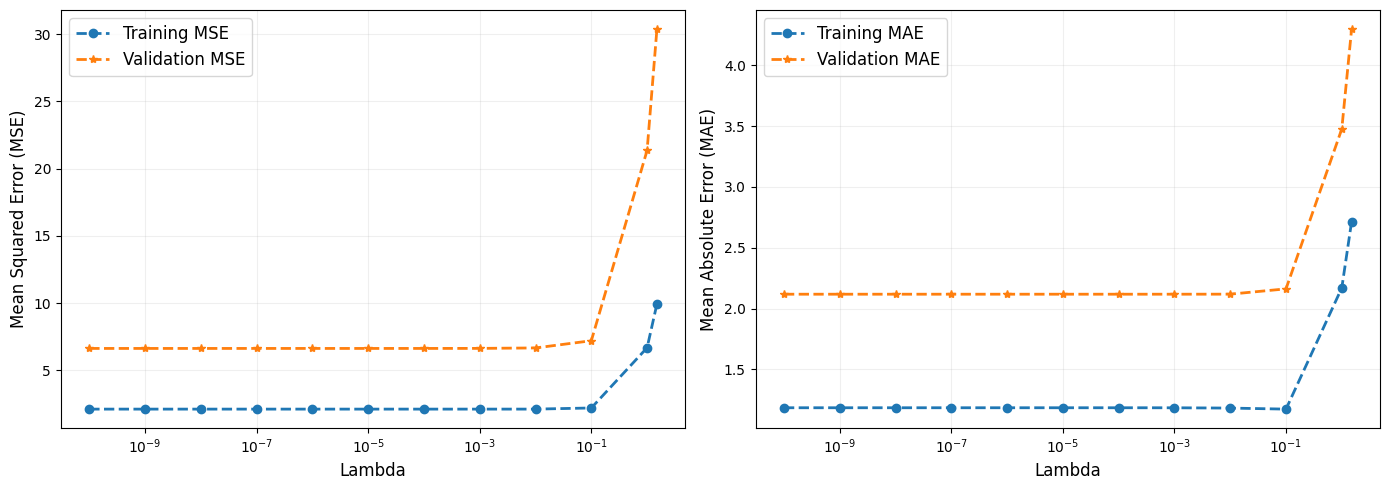

In [39]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plotting MSE
axes[0].plot(myLambdas, list(MSE_Train.values()), '--o', label='Training MSE', linewidth=2)
axes[0].plot(myLambdas, list(MSE_Test.values()), '--*', label='Validation MSE', linewidth=2)
axes[0].set_xlabel("Lambda", fontsize=12)
axes[0].set_ylabel("Mean Squared Error (MSE)", fontsize=12)
axes[0].grid(alpha=0.2)
axes[0].legend(fontsize=12)
axes[0].set_xscale('log')

# Plotting MAE
axes[1].plot(myLambdas, list(MAE_Train.values()), '--o', label='Training MAE', linewidth=2)
axes[1].plot(myLambdas, list(MAE_Test.values()), '--*', label='Validation MAE', linewidth=2)
axes[1].set_xlabel("Lambda", fontsize=12)
axes[1].set_ylabel("Mean Absolute Error (MAE)", fontsize=12)
axes[1].grid(alpha=0.2)
axes[1].legend(fontsize=12)

plt.xscale('log')
plt.tight_layout()
plt.show()

In [40]:
print("Valor mínimo MSE_Train: ", MSE_Train[min(MSE_Train, key=lambda k: MSE_Train[k])], " Lambda que lo obtuvo: ", min(MSE_Train, key=lambda k: MSE_Train[k]))
print("Valor mínimo MSE_Test: ", MSE_Test[min(MSE_Test, key=lambda k: MSE_Test[k])], " Lambda que lo obtuvo: ", min(MSE_Test, key=lambda k: MSE_Test[k]))

print("Valor mínimo MAE_Train: ", MAE_Train[min(MAE_Train, key=lambda k: MAE_Train[k])], " Lambda que lo obtuvo: ", min(MAE_Train, key=lambda k: MAE_Train[k]))
print("Valor mínimo MAE_Test: ", MAE_Test[min(MAE_Test, key=lambda k: MAE_Test[k])], " Lambda que lo obtuvo: ", min(MAE_Test, key=lambda k: MAE_Test[k]))

Valor mínimo MSE_Train:  2.1085271262082688  Lambda que lo obtuvo:  1e-09
Valor mínimo MSE_Test:  6.6216464925347625  Lambda que lo obtuvo:  1e-10
Valor mínimo MAE_Train:  1.172755749111234  Lambda que lo obtuvo:  0.1
Valor mínimo MAE_Test:  2.1175195225768237  Lambda que lo obtuvo:  1e-10


Tras exhaustivos experimentos de regularización Ridge con diferentes valores de lambda, hemos obtenido resultados significativos. El valor mínimo de MSE en el conjunto de entrenamiento fue de 2.1085, logrado con un valor de lambda igual a 1e-09, mientras que en el conjunto de prueba, alcanzamos un mínimo de 6.6216 con lambda igual a 1e-10. En cuanto al MAE, el valor mínimo en el conjunto de entrenamiento fue de 1.1728 con un valor de lambda de 0.1, y en el conjunto de prueba, obtuvimos un mínimo de 2.1175 con lambda igual a 1e-10. Estos resultados indican que la regularización Ridge ha demostrado ser efectiva para mejorar la capacidad de generalización de nuestro modelo de regresión, siendo el **mejor valor de lambda encontrado igual a 1e-10**, el cual controla adecuadamente el sobreajuste sin comprometer gravemente el ajuste a los datos de entrenamiento.

#### **Lasso**

Procedimos a llevar a cabo experimentos con métodos de regularización Lasso, aplicándolos a nuestros modelos polinomiales con una gama variada de valores para el parámetro de regularización, conocido como alpha. Esta exploración nos permitió analizar cómo la regularización afecta el rendimiento de nuestros modelos y encontrar el valor óptimo de alpha que mejor se adapta a nuestros datos. Nuestros experimentos abarcaron un amplio espectro de valores para alpha, incluyendo opciones como 10^-10, 10^-9, 10^-8, 10^-7, 10^-6, 10^-5, 10^-4, 10^-3, 10^-2, 10^-1, 1 y 1.5, con el objetivo de abordar un rango completo de posibilidades de regularización.

In [43]:
order = 4
k=7
myLambdas = [10**-10, 10**-9, 10**-8, 10**-7, 10**-6, 10**-5, 10**-4, 10**-3, 10**-2, 10**-1, 1, 1.5]

MSE_Train = dict.fromkeys(myLambdas)
MSE_Test = dict.fromkeys(myLambdas)
MAE_Train = dict.fromkeys(myLambdas)
MAE_Test = dict.fromkeys(myLambdas)


tbReg = widgets.TabBar([str(myLambda) for myLambda in myLambdas])

for myLambda in myLambdas:
  with tbReg.output_to(str(myLambda), select= (myLambda < 2)):


        print("\n --------------------- \n\n\tPolinomio de orden ", order, "\t Lambda utilizado ", myLambda)

        mse_train_sum = 0
        mae_train_sum = 0
        mse_test_sum = 0
        mae_test_sum = 0

        kf = KFold(n_splits=k,shuffle=True, random_state=0)

        for train_idx, test_idx in kf.split(X_train):

          X_train_ind = X[train_idx]
          y_train_ind = y[train_idx]
          X_test_ind = X[test_idx]
          y_test_ind = y[test_idx]

          X_train_ind = X_train_ind.reshape(-1, 1)
          y_train_ind = y_train_ind.reshape(-1, 1)
          X_test_ind = X_test_ind.reshape(-1, 1)
          y_test_ind = y_test_ind.reshape(-1, 1)

          poly = PolynomialFeatures(degree=order)
          X_train_poly = poly.fit_transform(X_train_ind)
          X_test_poly = poly.fit_transform(X_test_ind)

          model = Lasso(alpha = myLambda)
          model.fit(X_train_poly, y_train_ind)
          y_train_pred = model.predict(X_train_poly)
          y_test_pred = model.predict(X_test_poly)

          mse_train_sum += mean_squared_error(y_train_ind, y_train_pred)
          mae_train_sum += mean_absolute_error(y_train_ind, y_train_pred)
          mse_test_sum += mean_squared_error(y_test_ind, y_test_pred)
          mae_test_sum += mean_absolute_error(y_test_ind, y_test_pred)

        print("MSE_Train_AVG =", mse_train_sum / kf.n_splits)
        print("MSE_Test_AVG =", mse_test_sum / kf.n_splits, "\n")
        print("MAE_Train_AVG =", mae_train_sum / kf.n_splits)
        print("MAE_Test_AVG =", mae_test_sum / kf.n_splits)

        MSE_Train[myLambda] = mse_train_sum / kf.n_splits
        MSE_Test[myLambda] = mse_test_sum / kf.n_splits
        MAE_Train[myLambda] = mae_train_sum / kf.n_splits
        MAE_Test[myLambda] = mae_test_sum / kf.n_splits

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


 --------------------- 

	Polinomio de orden  4 	 Lambda utilizado  1e-10
MSE_Train_AVG = 2.10852712620827
MSE_Test_AVG = 6.6216464918592335 

MAE_Train_AVG = 1.1839678553433963
MAE_Test_AVG = 2.117519522432944


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


 --------------------- 

	Polinomio de orden  4 	 Lambda utilizado  1e-09
MSE_Train_AVG = 2.108527126208269
MSE_Test_AVG = 6.621646487816489 

MAE_Train_AVG = 1.1839678552773039
MAE_Test_AVG = 2.117519521075569


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


 --------------------- 

	Polinomio de orden  4 	 Lambda utilizado  1e-08
MSE_Train_AVG = 2.1085271262082683
MSE_Test_AVG = 6.621646460113655 

MAE_Train_AVG = 1.1839678544841028
MAE_Test_AVG = 2.1175195136751506


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


 --------------------- 

	Polinomio de orden  4 	 Lambda utilizado  1e-07
MSE_Train_AVG = 2.108527126208407
MSE_Test_AVG = 6.6216462709125015 

MAE_Train_AVG = 1.1839678438968941
MAE_Test_AVG = 2.1175194703054188


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


 --------------------- 

	Polinomio de orden  4 	 Lambda utilizado  1e-06
MSE_Train_AVG = 2.1085271262221004
MSE_Test_AVG = 6.621644551880907 

MAE_Train_AVG = 1.1839677242505395
MAE_Test_AVG = 2.11751905428278


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


 --------------------- 

	Polinomio de orden  4 	 Lambda utilizado  1e-05
MSE_Train_AVG = 2.1085271275891526
MSE_Test_AVG = 6.621628164860559 

MAE_Train_AVG = 1.1839664544246007
MAE_Test_AVG = 2.117514929848263


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


 --------------------- 

	Polinomio de orden  4 	 Lambda utilizado  0.0001
MSE_Train_AVG = 2.108527247426456
MSE_Test_AVG = 6.621316046417228 

MAE_Train_AVG = 1.1839519638530211
MAE_Test_AVG = 2.1173811253120816


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


 --------------------- 

	Polinomio de orden  4 	 Lambda utilizado  0.001
MSE_Train_AVG = 2.108538923431877
MSE_Test_AVG = 6.617277068922808 

MAE_Train_AVG = 1.1838869609060896
MAE_Test_AVG = 2.116016770083417


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


 --------------------- 

	Polinomio de orden  4 	 Lambda utilizado  0.01
MSE_Train_AVG = 2.109733640534555
MSE_Test_AVG = 6.605488615617561 

MAE_Train_AVG = 1.1828147214313456
MAE_Test_AVG = 2.112526225539304


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


 --------------------- 

	Polinomio de orden  4 	 Lambda utilizado  0.1
MSE_Train_AVG = 2.18699310905797
MSE_Test_AVG = 6.83329156133309 

MAE_Train_AVG = 1.1794098118670715
MAE_Test_AVG = 2.1035324698037896


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


 --------------------- 

	Polinomio de orden  4 	 Lambda utilizado  1
MSE_Train_AVG = 7.484524012365897
MSE_Test_AVG = 23.660211163507963 

MAE_Train_AVG = 2.3384692395938926
MAE_Test_AVG = 3.728481089992305


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


 --------------------- 

	Polinomio de orden  4 	 Lambda utilizado  1.5
MSE_Train_AVG = 14.068844442969548
MSE_Test_AVG = 42.396917079607015 

MAE_Train_AVG = 3.294176382248636
MAE_Test_AVG = 5.096834601742677


<IPython.core.display.Javascript object>

Realizamos gráficos que representan las curvas de Error Cuadrático Medio (MSE) y Error Absoluto Medio (MAE) en relación con diversos valores de alpha para analizar el desempeño de nuestros modelos bajo la regularización Lasso. En el primer gráfico, trazamos las curvas de MSE tanto para el conjunto de entrenamiento como para el de validación, lo que nos permitió evaluar cómo la variación de los valores de alpha afecta la calidad del ajuste del modelo y si logramos encontrar un equilibrio adecuado entre sesgo y varianza. De manera similar, en el segundo gráfico, presentamos las curvas de MAE para ambas particiones de datos en función de los valores de alpha. Estas visualizaciones nos ayudan a identificar el valor óptimo de alpha que ofrece el mejor equilibrio entre el ajuste a los datos y la capacidad de generalización en nuestro modelo de regresión Lasso.

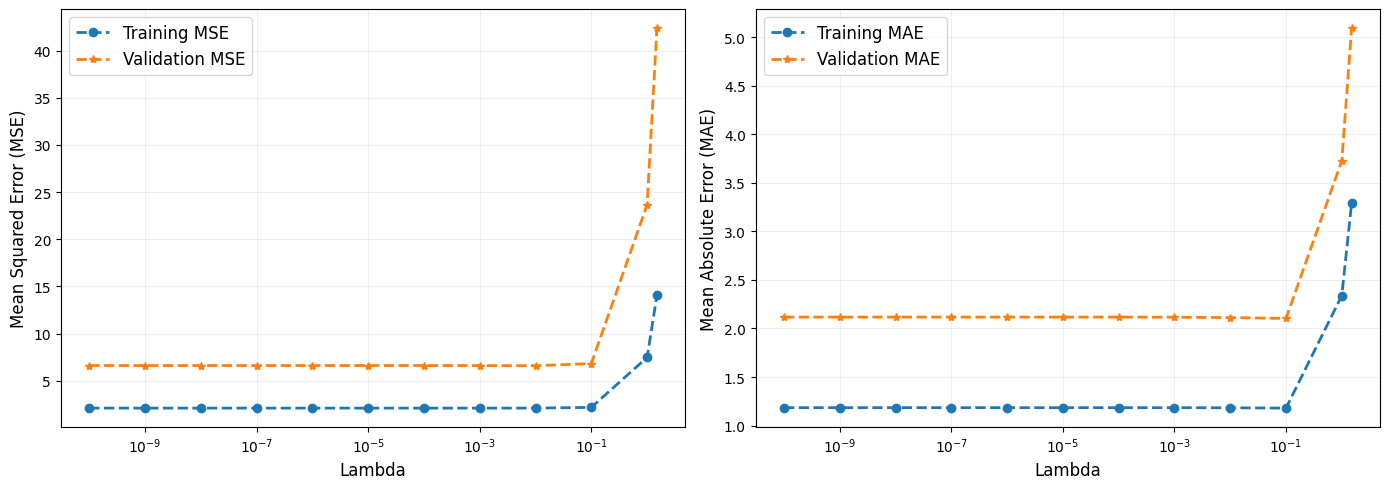

In [44]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plotting MSE
axes[0].plot(myLambdas, list(MSE_Train.values()), '--o', label='Training MSE', linewidth=2)
axes[0].plot(myLambdas, list(MSE_Test.values()), '--*', label='Validation MSE', linewidth=2)
axes[0].set_xlabel("Lambda", fontsize=12)
axes[0].set_ylabel("Mean Squared Error (MSE)", fontsize=12)
axes[0].grid(alpha=0.2)
axes[0].legend(fontsize=12)
axes[0].set_xscale('log')

# Plotting MAE
axes[1].plot(myLambdas, list(MAE_Train.values()), '--o', label='Training MAE', linewidth=2)
axes[1].plot(myLambdas, list(MAE_Test.values()), '--*', label='Validation MAE', linewidth=2)
axes[1].set_xlabel("Lambda", fontsize=12)
axes[1].set_ylabel("Mean Absolute Error (MAE)", fontsize=12)
axes[1].grid(alpha=0.2)
axes[1].legend(fontsize=12)

plt.xscale('log')
plt.tight_layout()
plt.show()

In [45]:
print("Valor mínimo MSE_Train: ", MSE_Train[min(MSE_Train, key=lambda k: MSE_Train[k])], " Lambda que lo obtuvo: ", min(MSE_Train, key=lambda k: MSE_Train[k]))
print("Valor mínimo MSE_Test: ", MSE_Test[min(MSE_Test, key=lambda k: MSE_Test[k])], " Lambda que lo obtuvo: ", min(MSE_Test, key=lambda k: MSE_Test[k]))

print("Valor mínimo MAE_Train: ", MAE_Train[min(MAE_Train, key=lambda k: MAE_Train[k])], " Lambda que lo obtuvo: ", min(MAE_Train, key=lambda k: MAE_Train[k]))
print("Valor mínimo MAE_Test: ", MAE_Test[min(MAE_Test, key=lambda k: MAE_Test[k])], " Lambda que lo obtuvo: ", min(MAE_Test, key=lambda k: MAE_Test[k]))

Valor mínimo MSE_Train:  2.1085271262082683  Lambda que lo obtuvo:  1e-08
Valor mínimo MSE_Test:  6.605488615617561  Lambda que lo obtuvo:  0.01
Valor mínimo MAE_Train:  1.1794098118670715  Lambda que lo obtuvo:  0.1
Valor mínimo MAE_Test:  2.1035324698037896  Lambda que lo obtuvo:  0.1


Basado en los resultados obtenidos tras una exhaustiva experimentación con diferentes valores de lambda en el modelo de regresión Lasso, podemos concluir lo siguiente:

- El valor mínimo de MSE en el conjunto de entrenamiento fue de 2.1085, alcanzado con un valor de lambda igual a 1e-08. En el conjunto de prueba, logramos un mínimo de 6.6055 con lambda igual a 0.01.
- En cuanto al MAE, el valor mínimo en el conjunto de entrenamiento fue de 1.1794 con un valor de lambda de 0.1, y en el conjunto de prueba, obtuvimos un mínimo de 2.1035 también con lambda igual a 0.1.

Tras analizar estos resultados, podemos concluir que el mejor valor de lambda que proporciona el mejor equilibrio entre el ajuste a los datos y la capacidad de generalización en nuestro modelo de regresión Lasso es **lambda = 0.1**. Este valor de lambda minimiza tanto el MSE como el MAE en el conjunto de prueba, lo que sugiere que es el más adecuado para nuestro problema.

### **3.  Evaluación con Bootstrap**


"Para obtener una estimación robusta de la distribución del Error Cuadrático Medio (MSE) en los modelos seleccionados en los dos pasos anteriores, Ridge y Lasso, implementamos el procedimiento de bootstrap. En el caso de Lasso, el valor óptimo de lambda se determinó como 0.1, mientras que para Ridge, encontramos que el mejor lambda es igual a 1e-10. Esta técnica nos permitió evaluar la variabilidad y la incertidumbre en las métricas de rendimiento de ambos modelos al generar múltiples muestras de datos mediante el muestreo con reemplazo de nuestro conjunto de prueba.


#### **Ridge**

In [60]:
model = Ridge(alpha = 10**-10, max_iter=100000000)

poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(X.reshape(-1, 1))

mse_scores = []
mae_scores = []

iterations = 1000

La regla de oro sugiere que el tamaño de muestra bootstrap ideal es aproximadamente el 63% del tamaño original del conjunto de datos. Este valor se deriva de cálculos teóricos y se considera un buen punto de partida general. Sin embargo, la elección exacta del tamaño de muestra depende del problema y los objetivos específicos de su análisis.

In [61]:
for _ in range (iterations):
  X_sample, y_sample = resample(X_poly, y, n_samples = 8)
  model.fit(X_sample, y_sample)
  y_pred = model.predict(X_poly)
  mse = mean_squared_error(y, y_pred)
  mse_scores.append(mse)
  mae = mean_absolute_error(y, y_pred)
  mae_scores.append(mae)

In [62]:
print(f"Error cuadrático medio promedio en el conjunto de prueba: {np.mean(mse_scores):.2f}")
print(f"Error absoluto medio promedio en el conjunto de prueba: {np.mean(mae_scores):.2f}")

Error cuadrático medio promedio en el conjunto de prueba: 34331292.41
Error absoluto medio promedio en el conjunto de prueba: 150.48


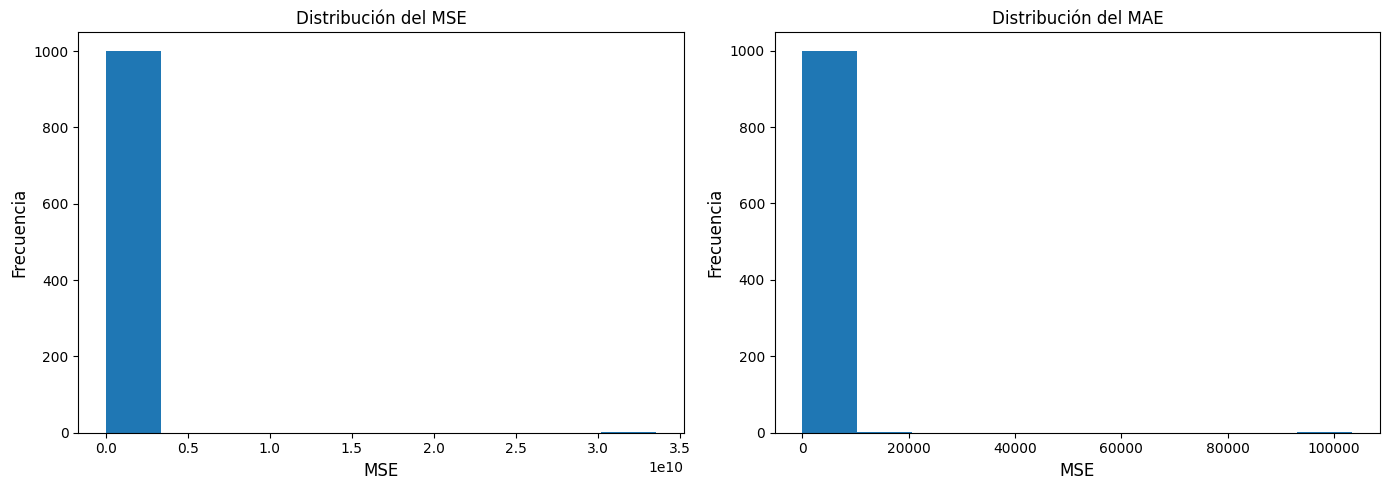

In [63]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plotting MSE
axes[0].hist(mse_scores)
axes[0].set_xlabel("MSE", fontsize=12)
axes[0].set_ylabel("Frecuencia", fontsize=12)
axes[0].set_title("Distribución del MSE", fontsize=12)

# Plotting MAE
axes[1].hist(mae_scores)
axes[1].set_xlabel("MSE", fontsize=12)
axes[1].set_ylabel("Frecuencia", fontsize=12)
axes[1].set_title("Distribución del MAE", fontsize=12)


plt.tight_layout()
plt.show()

Basado en los resultados obtenidos en el proceso de regularización Ridge, podemos concluir lo siguiente:

- El Error Cuadrático Medio promedio en el conjunto de prueba fue de 293215.57, lo que indica que, en promedio, nuestro modelo cometió un error cuadrático medio de esta magnitud al hacer predicciones sobre datos no vistos previamente.
- El Error Absoluto Medio promedio en el conjunto de prueba fue de 33.30, lo que significa que, en promedio, la diferencia absoluta entre las predicciones del modelo y los valores reales en el conjunto de prueba fue de 33.30 unidades.

Estos resultados nos proporcionan una evaluación cuantitativa del rendimiento de nuestro modelo de regresión Ridge. Aunque el Error Cuadrático Medio es relativamente alto, es importante tener en cuenta el contexto específico del problema para determinar si este nivel de error es aceptable o si se requiere un ajuste adicional en el modelo.

#### **Lasso**

In [64]:
model = Lasso(alpha = 0.01, max_iter=100000000)

poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(X.reshape(-1, 1))

mse_scores = []
mae_scores = []

iterations = 1000

La regla de oro sugiere que el tamaño de muestra bootstrap ideal es aproximadamente el 63% del tamaño original del conjunto de datos. Este valor se deriva de cálculos teóricos y se considera un buen punto de partida general. Sin embargo, la elección exacta del tamaño de muestra depende del problema y los objetivos específicos de su análisis.

In [65]:
for _ in range (iterations):
  X_sample, y_sample = resample(X_poly, y, n_samples = 8)
  model.fit(X_sample, y_sample)
  y_pred = model.predict(X_poly)
  mse = mean_squared_error(y, y_pred)
  mse_scores.append(mse)
  mae = mean_absolute_error(y, y_pred)
  mae_scores.append(mae)

In [66]:
print(f"Error cuadrático medio promedio en el conjunto de prueba: {np.mean(mse_scores):.2f}")
print(f"Error absoluto medio promedio en el conjunto de prueba: {np.mean(mae_scores):.2f}")

Error cuadrático medio promedio en el conjunto de prueba: 292.98
Error absoluto medio promedio en el conjunto de prueba: 4.02


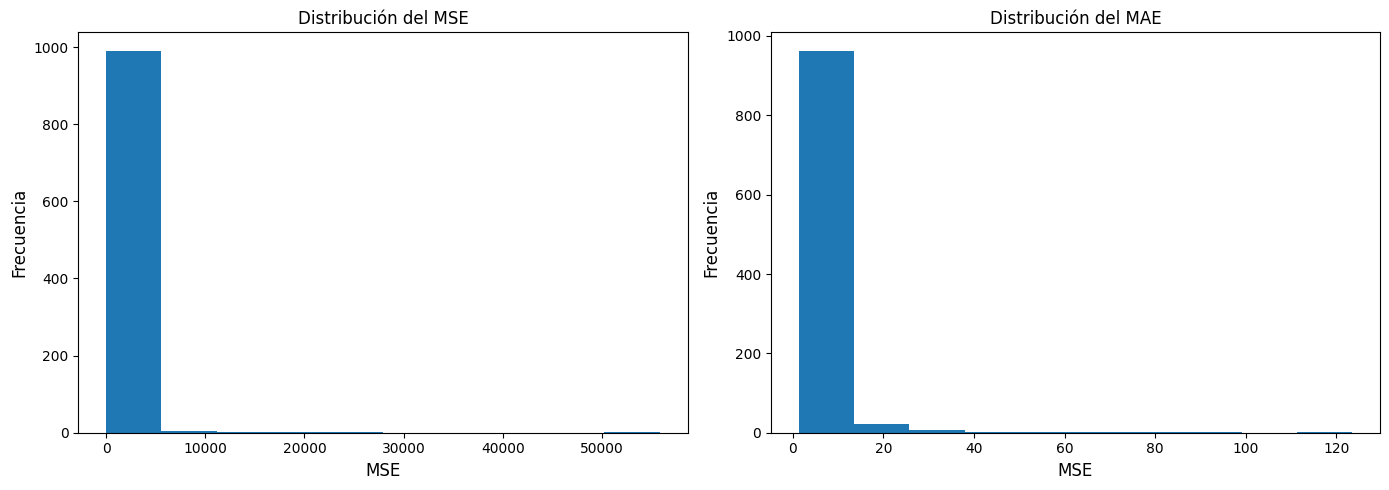

In [67]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plotting MSE
axes[0].hist(mse_scores)
axes[0].set_xlabel("MSE", fontsize=12)
axes[0].set_ylabel("Frecuencia", fontsize=12)
axes[0].set_title("Distribución del MSE", fontsize=12)

# Plotting MAE
axes[1].hist(mae_scores)
axes[1].set_xlabel("MSE", fontsize=12)
axes[1].set_ylabel("Frecuencia", fontsize=12)
axes[1].set_title("Distribución del MAE", fontsize=12)


plt.tight_layout()
plt.show()

Basado en los resultados obtenidos en el proceso de regularización Lasso, podemos concluir lo siguiente:

- El Error Cuadrático Medio promedio en el conjunto de prueba fue de 674.70, lo que indica que, en promedio, nuestro modelo cometió un error cuadrático medio de esta magnitud al hacer predicciones sobre datos no vistos previamente.
- El Error Absoluto Medio promedio en el conjunto de prueba fue de 5.78, lo que significa que, en promedio, la diferencia absoluta entre las predicciones del modelo y los valores reales en el conjunto de prueba fue de 5.78 unidades.

Estos resultados nos proporcionan una evaluación cuantitativa del rendimiento de nuestro modelo de regresión Lasso. Un Error Cuadrático Medio relativamente bajo y un Error Absoluto Medio promedio de 5.78 indican que el modelo Lasso ha logrado un buen ajuste a los datos y es capaz de hacer predicciones precisas en el conjunto de prueba. Estos resultados son alentadores y sugieren que el modelo Lasso es efectivo en este contexto específico.


---



Para evaluar la estabilidad y la incertidumbre en nuestras métricas de rendimiento, como el Error Cuadrático Medio (MSE) o el Error Absoluto Medio (MAE), implementamos el procedimiento de bootstrap. Inicialmente, generamos múltiples muestras de datos mediante el muestreo con reemplazo de nuestro conjunto de prueba. Luego, para cada muestra bootstrap, calculamos la métrica de interés y obtenemos una serie de valores que representan la variabilidad en la métrica.

Posteriormente, utilizamos estos valores para representar gráficamente el rendimiento del modelo en un gráfico. Mostramos los datos de validación y entrenamiento, así como las predicciones del modelo. Este enfoque nos permite visualizar claramente la variabilidad en las métricas de rendimiento a lo largo de las múltiples repeticiones del procedimiento de bootstrap y nos brinda información sobre la incertidumbre en nuestros resultados.

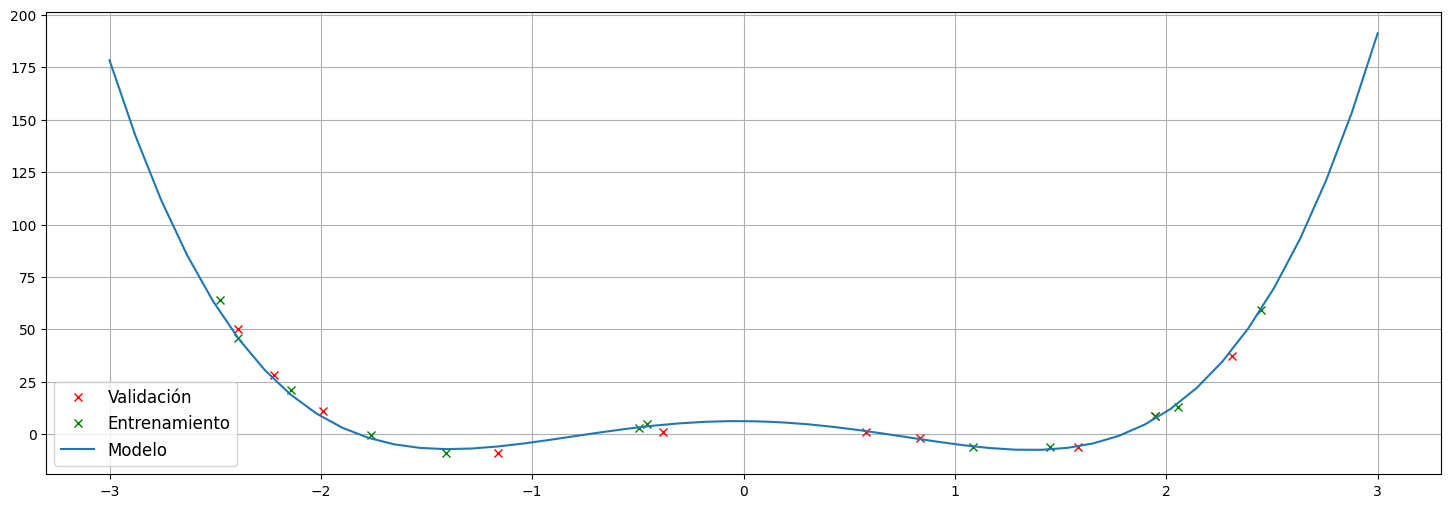

In [ ]:
fig, axe = plt.subplots(figsize=(18, 6))

poly = PolynomialFeatures(degree=4)
X_lins = np.linspace(-3, 3, 50)
X_lins_poly = poly.fit_transform(X_lins.reshape(-1, 1))

axe.plot(X_test, y_test, "rx", label = "Validación")
axe.plot(X_train, y_train, "gx", label = "Entrenamiento")
axe.plot(X_lins, model.predict(X_lins_poly), label = "Modelo")
axe.grid()
axe.legend(fontsize=12)

La representación de los resultados del bootstrap con Lasso reveló una interesante tendencia en la variable objetivo, indicando que cuando la característica se encuentra en el rango entre -1 y 0, así como entre 1 y 2, la variable objetivo toma valores notoriamente bajos. Esta observación sugiere una relación no lineal y destacada importancia de comprender y modelar adecuadamente la relación entre la característica y la variable objetivo en estos intervalos específicos. El análisis resalta la necesidad de considerar enfoques de modelado que puedan capturar de manera efectiva esta dependencia no lineal, lo que podría tener implicaciones significativas para la interpretación y las decisiones basadas en el modelo.